In [ ]:
import cv2
import numpy as np
import time
import matplotlib.pyplot as plt

In [15]:
img = cv2.imread("docs/image.jpg", cv2.IMREAD_GRAYSCALE)
_, bin_img = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

In [26]:
def erosion_cv2(bin_img, kernel_size):
    kernel = np.ones((kernel_size, kernel_size), np.uint8)
    return cv2.erode(bin_img, kernel, iterations=1)

In [45]:
def erosion_native(bin_img, kernel_size):
    h, w = bin_img.shape
    out = np.zeros_like(bin_img)
    offset = kernel_size // 2
    for y in range(offset, h - offset):
        for x in range(offset, w - offset):
            window = bin_img[y-offset:y+offset+1, x-offset:x+offset+1]
            if np.all(window == 255):
                out[y, x] = 255
    return out

In [39]:
t0 = time.time()
res_cv2 = erosion_cv2(bin_img, 3)
t1 = time.time()
res_native = erosion_native(bin_img, 3)
t2 = time.time()

print("OpenCV erosion:", t1 - t0, "sec")
print("Native erosion:", t2 - t1, "sec")

OpenCV erosion: 0.0002307891845703125 sec
Native erosion: 0.6950540542602539 sec


In [40]:
cv2.imwrite("erosion_cv2.png", res_cv2)
cv2.imwrite("erosion_native.png", res_native)
cv2.imwrite("binarized.png", bin_img)

True

In [20]:
res_cv2.shape

(750, 600)

In [21]:
bin_img

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], shape=(750, 600), dtype=uint8)

In [46]:
# Измерение времени выполнения для разных размеров ядра
kernel_sizes = list(range(3, 10, 1))  # 3, 13, 23, 33, ..., 93
times_cv2 = []
times_native = []

print("Измерение времени выполнения...")
for k_size in kernel_sizes:
    # OpenCV
    t0 = time.time()
    _ = erosion_cv2(bin_img, k_size)
    t1 = time.time()
    times_cv2.append(t1 - t0)
    
    # Native
    t2 = time.time()
    _ = erosion_native(bin_img, k_size)
    t3 = time.time()
    times_native.append(t3 - t2)
    
    print(f"Kernel size {k_size:3d}: OpenCV={times_cv2[-1]:.6f}s, Native={times_native[-1]:.6f}s")

print("\nИзмерения завершены!")


Измерение времени выполнения...
Kernel size   3: OpenCV=0.000339s, Native=1.476526s
Kernel size   4: OpenCV=0.000192s, Native=1.432292s
Kernel size   5: OpenCV=0.000192s, Native=1.441830s
Kernel size   6: OpenCV=0.000183s, Native=1.430119s
Kernel size   7: OpenCV=0.000232s, Native=1.422917s
Kernel size   8: OpenCV=0.000333s, Native=1.342837s
Kernel size   9: OpenCV=0.000237s, Native=1.346939s

Измерения завершены!


In [31]:
%pip install matplotlib

  Using cached matplotlib-3.10.7-cp312-cp312-macosx_11_0_arm64.whl.metadata (11 kB)
  Using cached contourpy-1.3.3-cp312-cp312-macosx_11_0_arm64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.61.0-cp312-cp312-macosx_10_13_universal2.whl.metadata (113 kB)
  Using cached kiwisolver-1.4.9-cp312-cp312-macosx_11_0_arm64.whl.metadata (6.3 kB)
  Using cached pillow-12.0.0-cp312-cp312-macosx_11_0_arm64.whl.metadata (8.8 kB)
  Using cached pyparsing-3.2.5-py3-none-any.whl.metadata (5.0 kB)
Using cached matplotlib-3.10.7-cp312-cp312-macosx_11_0_arm64.whl (8.1 MB)
Using cached contourpy-1.3.3-cp312-cp312-macosx_11_0_arm64.whl (273 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.61.0-cp312-cp312-macosx_10_13_universal2.whl (2.8 MB)
Using cached kiwisolver-1.4.9-cp312-cp312-macosx_11_0_arm64.whl (64 kB)
Using cached pillow-12.0.0-cp312-cp312-macosx_11_0_arm64.whl (4.7 MB)
Using cached pyparsing-3.2.5

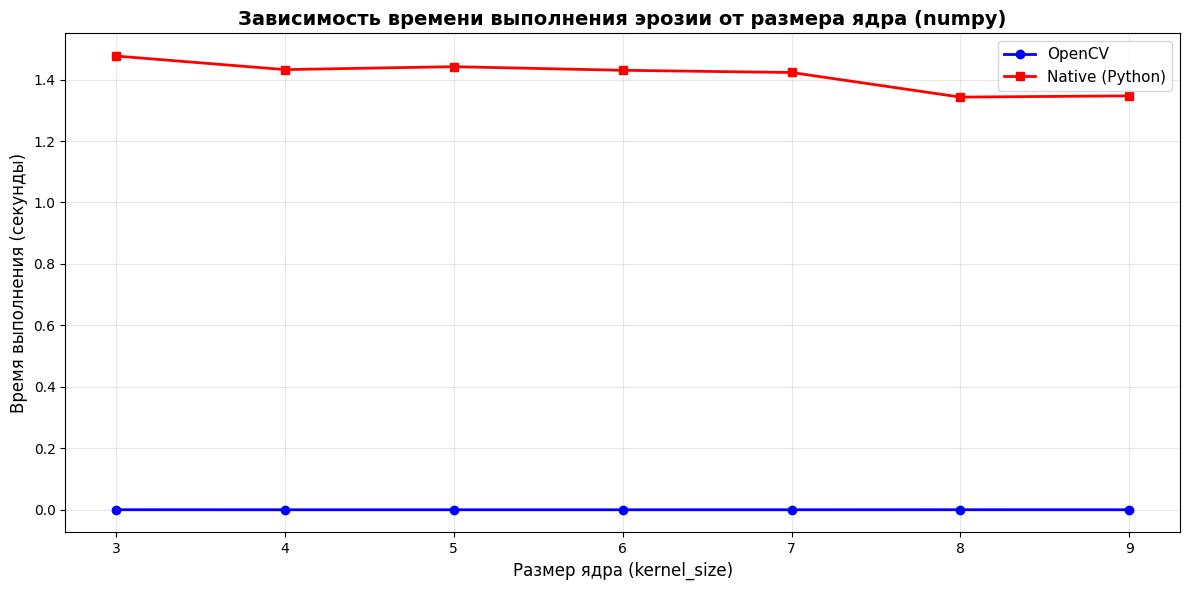


Статистика:
OpenCV - мин: 0.000183s, макс: 0.000339s, среднее: 0.000244s
Native - мин: 1.342837s, макс: 1.476526s, среднее: 1.413351s
Ускорение OpenCV: в 5792.3 раз быстрее


In [48]:
import matplotlib.pyplot as plt

# Построение графика
plt.figure(figsize=(12, 6))
plt.plot(kernel_sizes, times_cv2, 'b-o', label='OpenCV', linewidth=2, markersize=6)
plt.plot(kernel_sizes, times_native, 'r-s', label='Native (Python)', linewidth=2, markersize=6)
plt.xlabel('Размер ядра (kernel_size)', fontsize=12)
plt.ylabel('Время выполнения (секунды)', fontsize=12)
plt.title('Зависимость времени выполнения эрозии от размера ядра (numpy)', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Вывод статистики
print(f"\nСтатистика:")
print(f"OpenCV - мин: {min(times_cv2):.6f}s, макс: {max(times_cv2):.6f}s, среднее: {np.mean(times_cv2):.6f}s")
print(f"Native - мин: {min(times_native):.6f}s, макс: {max(times_native):.6f}s, среднее: {np.mean(times_native):.6f}s")
print(f"Ускорение OpenCV: в {np.mean(times_native)/np.mean(times_cv2):.1f} раз быстрее")
